In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(
    "../data/SG-ES.csv", 
    # "../../../Downloads/SG-RJ.csv", 
    parse_dates=["dataNotificacao", "dataEncerramento", "dataInicioSintomas"], 
    encoding="utf-8", 
    sep=";"
)

df

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-02-16,NaN,NaN,NaN,38.0
1,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Pernambuco,...,NaN,NaN,NaN,NaN,NaN,2022-06-25,NaN,NaN,NaN,47.0
2,"Coriza, Tosse, Dor de Cabeça",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-06-21,NaN,NaN,NaN,NaN
3,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-07-30,NaN,NaN,NaN,NaN
4,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Pernambuco,...,NaN,NaN,NaN,NaN,NaN,2022-06-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,Assintomático,Não,Branca,NaN,NaN,Não,NaN,NaN,Feminino,Pernambuco,...,NaN,NaN,NaN,NaN,NaN,2022-07-18,NaN,NaN,NaN,41.0
1586,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-06-18,NaN,NaN,NaN,NaN
1587,"Coriza, Tosse",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-06-13,NaN,NaN,NaN,3.0
1588,Assintomático,Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Pernambuco,...,NaN,NaN,NaN,NaN,NaN,2022-06-26,NaN,NaN,NaN,4.0


In [3]:

date_range = pd.date_range(
    # start=df['dataInicioSintomas'].min(), # Notificação ou início dos sintomas?
    start=df['dataNotificacao'].min(),
    end=df['dataEncerramento'].max(),
    freq='D'
)

sir = pd.DataFrame(
    index=date_range, 
    columns=['I', 'R'], 
    dtype='int'
)

In [4]:
df[df["dataEncerramento"].isnull()].shape[0]

781

In [5]:
df[df["dataInicioSintomas"].isnull()].shape[0]

642

In [6]:
# df = df.dropna(axis=0, subset=['dataEncerramento'])

In [7]:
# df = df.dropna(axis=0, subset=['dataInicioSintomas'])

In [8]:
pd.set_option('future.no_silent_downcasting', True)
sir = sir.fillna(0)

for i, row in df.iterrows():
    
    # start=df['dataInicioSintomas'].min() # Notificação ou início dos sintomas?
    start = row['dataNotificacao']
    end = start + pd.Timedelta(days=7)
    # end = row['dataEncerramento']
    
    if pd.isna(end):  
        sir.loc[start:, 'I'] += 1
    else: 
        assert start <= end, f"Inconsistency at row {i}, start={start}, end={end}"
        sir.loc[start:end - pd.Timedelta(days=1), 'I'] += 1
        sir.loc[end:, 'R'] += 1


In [9]:
sir

,I,R
2020-08-04,1.0,0.0
2020-08-05,1.0,0.0
2020-08-06,1.0,0.0
2020-08-07,1.0,0.0
2020-08-08,1.0,0.0
...,...,...
2025-08-15,0.0,1590.0
2025-08-16,0.0,1590.0
2025-08-17,0.0,1590.0
2025-08-18,0.0,1590.0


In [10]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1842 entries, 2020-08-04 to 2025-08-19
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       1842 non-null   float64
 1   R       1842 non-null   float64
dtypes: float64(2)
memory usage: 107.7 KB


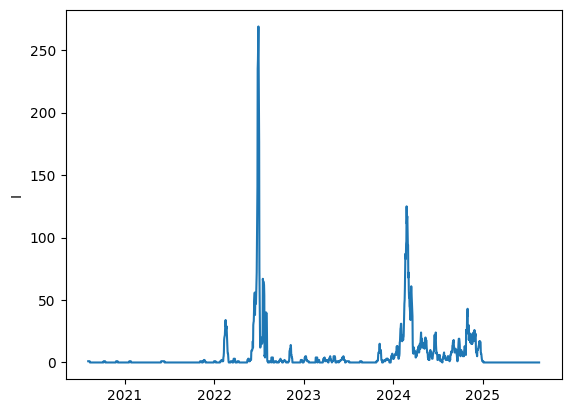

In [11]:
sns.lineplot(data=sir["I"])
plt.show()

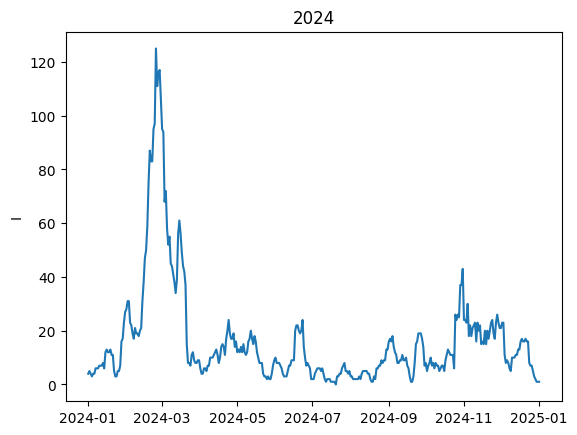

In [25]:
sns.lineplot(data=sir["I"]["2024-01-01":"2025-01-01"])
plt.title("2024")
plt.savefig("../images/data-2024-ES")
plt.show()

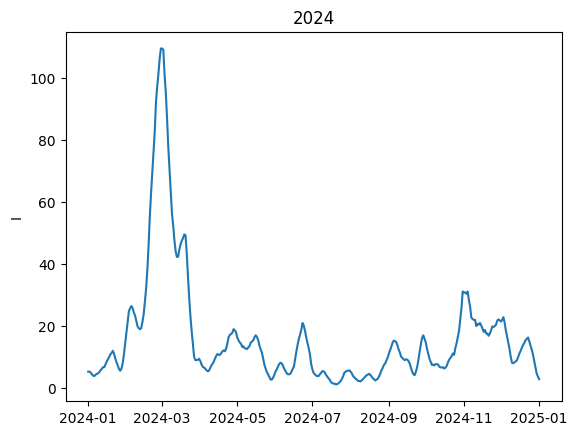

In [ ]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2024-01-01":"2025-01-01"])
plt.title("2024")
plt.savefig("../images/smoothed-data-2024-ES")
plt.show()

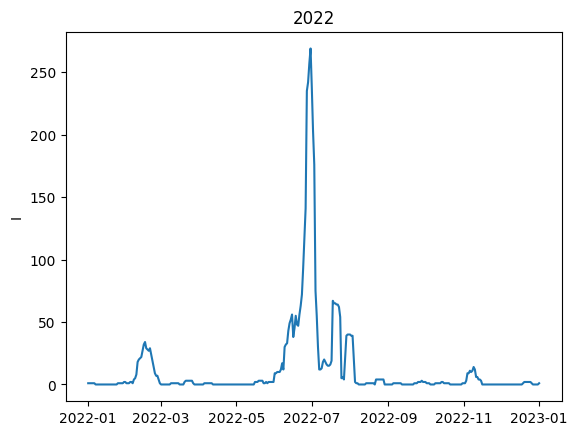

In [14]:
sns.lineplot(data=sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

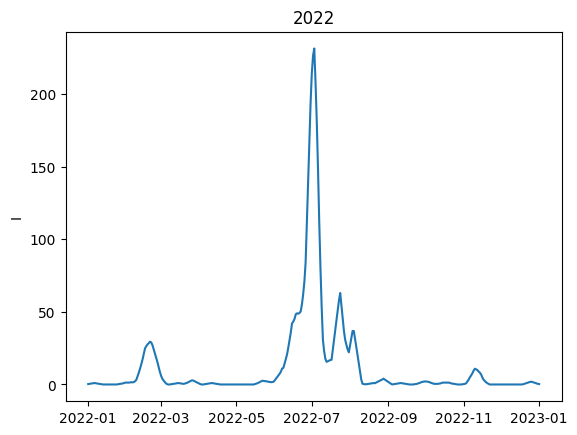

In [15]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

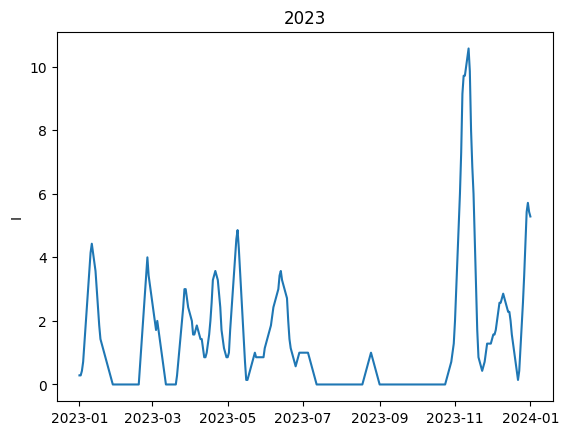

In [16]:
sns.lineplot(data=smoothed_sir["I"]["2023-01-01":"2024-01-01"])
plt.title("2023")
plt.show()

In [17]:
smoothed_sir.shape

(1842, 2)

In [18]:
sir.shape

(1842, 2)

In [19]:
smoothed_sir["I"]["2023-01-01":"2024-01-01"].shape

(366,)

In [20]:
smoothed_sir["I"]["2023-01-01":"2023-12-31"]

2023-01-01    0.285714
2023-01-02    0.285714
2023-01-03    0.428571
2023-01-04    0.714286
2023-01-05    1.285714
                ...   
2023-12-27    3.428571
2023-12-28    4.428571
2023-12-29    5.428571
2023-12-30    5.714286
2023-12-31    5.428571
Freq: D, Name: I, Length: 365, dtype: float64

In [21]:
smoothed_sir["I"]["2024-01-01":"2024-12-31"].to_csv('../data/sir-es-7d.csv', index=False)

In [22]:
smoothed_sir["I"]["2024-01-01":"2024-12-31"].shape

(366,)

In [23]:
smoothed_sir["I"]["2024-01-01":"2024-12-31"].std()

np.float64(19.179836141464495)